<a href="https://colab.research.google.com/github/SANGJI-PARK/Codestates_Project/blob/main/%5BSection1_Project%5DGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 Project 

--- 


**목차**
1. 지역 별 선호 게임 장르
2. 연도별 게임 트레드
3. 출고량이 높은 게임에 대한 분석 및 시각화 
4. 결론

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv').drop(['Unnamed: 0'],axis=1)
df.shape

(16598, 9)

In [3]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 결측치 행 제거
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.isnull().sum())

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [5]:
df['Year']=df['Year'].astype(int)
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [6]:
# Year 데이터 정제

for i in range(df.shape[0]):
  if df.loc[i,'Year'] <= 21 :
    df.loc[i,'Year'] += 2000
  elif df.loc[i,'Year']< 99  :
    df.loc[i,'Year'] += 1900

df.loc[:,'Year']


0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [9]:
# 판매량 변수들 - 점 제거
for i in range(df.shape[0]):
  for j in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    df.loc[i,j] = df.loc[i,j].replace('.','')
    
df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,004,0,0,0
1,017,0,0,001
2,0,0,002,0
3,004,0,0,0
4,012,009,0,004
5,0,0,014,0
6,002,001,0,0
7,007,0,011,001
8,0,0,004,0
9,004,003,0,001


In [10]:
# 판매량 변수들 - 단위 변환
for i in range(df.shape[0]):
  for j in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    if df.loc[i,j][-1] == 'K' :
      df.loc[i,j] = df.loc[i,j].replace('K','')
      df.loc[i,j] += '000'

    elif df.loc[i,j][-1] == 'M' :
      df.loc[i,j]  = df.loc[i,j].replace('M','')
      df.loc[i,j] += '000000'

    else :
      df.loc[i,j] += '000000'

df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,004000000,0000000,0000000,0000000
1,017000000,0000000,0000000,001000000
2,0000000,0000000,002000000,0000000
3,004000000,0000000,0000000,0000000
4,012000000,009000000,0000000,004000000
5,0000000,0000000,014000000,0000000
6,002000000,001000000,0000000,0000000
7,007000000,0000000,011000000,001000000
8,0000000,0000000,004000000,0000000
9,004000000,003000000,0000000,001000000


In [11]:
# 판매량 변수들 - 형변환(string -> int)
for i in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df[i] = df[i].astype(int)

df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object

# 1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [13]:
grouped_Genre = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(df['Genre']).sum().reset_index()
grouped_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,76377030000,46653220000,14653170000,16841910000
1,Adventure,9459270000,5821140000,4965060000,1527080000
2,Fighting,20361810000,8943390000,7634180000,3358140000
3,Misc,36283760000,18002140000,9369230000,6765130000
4,Platform,41222310000,18396290000,10449210000,4472340000
5,Puzzle,9325070000,4790050000,4706000000,1199000000
6,Racing,32793490000,21576630000,5300260000,7239340000
7,Role-Playing,29515210000,16641030000,30862830000,5150730000
8,Shooter,52946650000,27848340000,3328040000,9639340000
9,Simulation,16409870000,9381100000,5933250000,2918070000


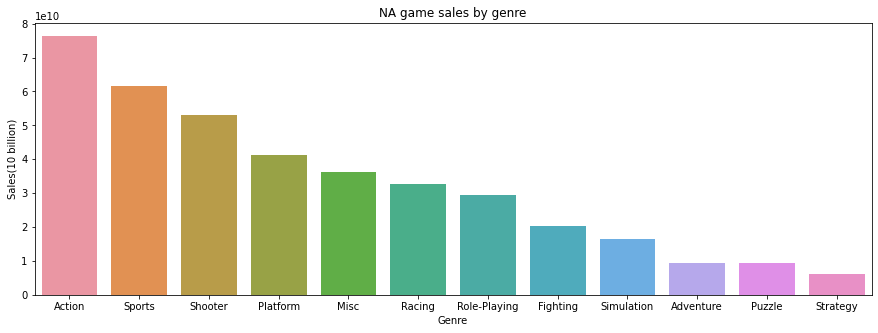

In [14]:
# NA game sales by genre

plt.figure(figsize=(15,5))
genre_NA = grouped_Genre.loc[:,['Genre','NA_Sales']].sort_values(by='NA_Sales',ascending=False)
g1 = sns.barplot(data=genre_NA,x='Genre',y='NA_Sales')
g1.set_title('NA game sales by genre')
g1.set_ylabel('Sales(10 billion)') #10억단위
plt.show()




#genre_NA

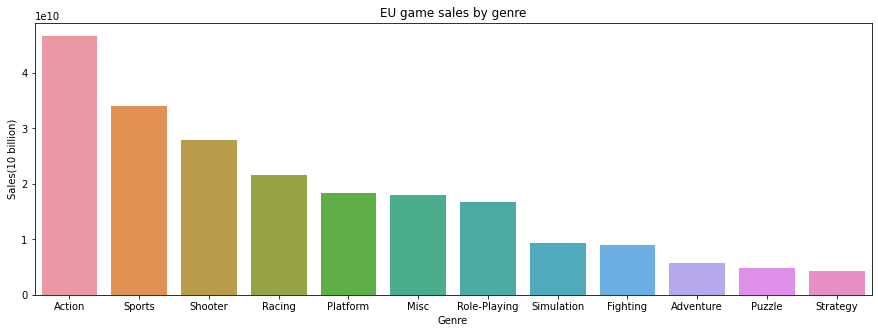

In [15]:
# EU game sales by genre
plt.figure(figsize=(15,5))
genre_EU = grouped_Genre.loc[:,['Genre','EU_Sales']].sort_values(by='EU_Sales',ascending=False)
g2 = sns.barplot(data=genre_EU,x='Genre',y='EU_Sales')
g2.set_title('EU game sales by genre')
g2.set_ylabel('Sales(10 billion)') #10억단위
plt.show()


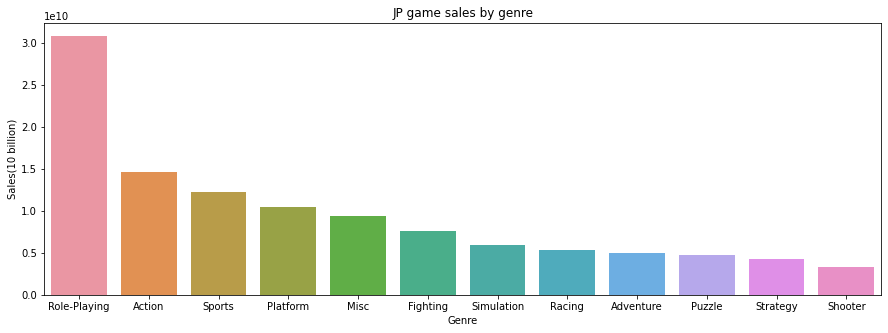

In [16]:
# JP game sales by genre
plt.figure(figsize=(15,5))
genre_JP = grouped_Genre.loc[:,['Genre','JP_Sales']].sort_values(by='JP_Sales',ascending=False)
g3 = sns.barplot(data=genre_JP,x='Genre',y='JP_Sales')
g3.set_title('JP game sales by genre')
g3.set_ylabel('Sales(10 billion)') #10억단위
plt.show()

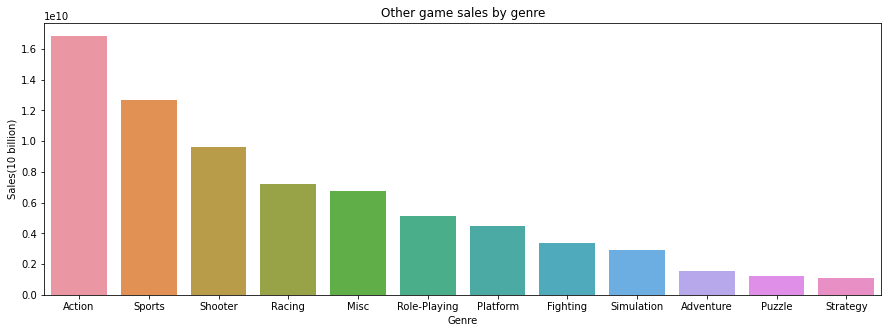

In [17]:
# Other game sales by genre
plt.figure(figsize=(15,5))
genre_Other = grouped_Genre.loc[:,['Genre','Other_Sales']].sort_values(by='Other_Sales',ascending=False)
g4 = sns.barplot(data=genre_Other,x='Genre',y='Other_Sales')
g4.set_title('Other game sales by genre')
g4.set_ylabel('Sales(10 billion)') #10억단위
plt.show()

#### 해석(1)
일본을 제외한 모든 지역에서 중하위권의 판매량을 보이는 "Role-Playing" 장르가 일본 지역에서만  1등을 차지함. 이 점을 제외하고는 지역별 차이는 크게 없어보임.

# 2. 연도별 게임의 트렌드

In [18]:
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000,0,0,0,4000000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000,0,0,1000000,18000000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2000000,0,2000000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000,0,0,0,4000000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000,9000000,0,4000000,25000000


In [19]:
df2 = df.loc[:,['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']]
year_genre = df2.groupby(by=['Year','Genre']).sum().reset_index()
year_genre


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,1980,Action,32000000,2000000,0,0,34000000
1,1980,Fighting,72000000,4000000,0,1000000,77000000
2,1980,Misc,253000000,15000000,0,2000000,270000000
3,1980,Shooter,260000000,43000000,0,8000000,311000000
4,1981,Action,1323000000,70110000,0,12000000,1405110000
...,...,...,...,...,...,...,...
383,2016,Sports,457000000,736000000,78000000,183000000,1454000000
384,2016,Strategy,11000000,14000000,5000000,4000000,34000000
385,2017,Action,0,0,1000000,0,1000000
386,2017,Role-Playing,0,0,4000000,0,4000000


### 연도별 게임 트렌드 - 전지역

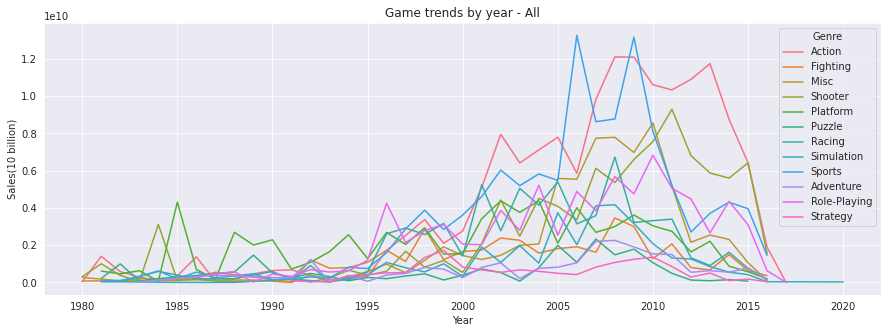

In [20]:
# Game trends by year - All
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='Total',hue='Genre')
y_g.set_title('Game trends by year - All')
y_g.set_ylabel('Sales(10 billion)')
#y_g.annotate(text='Misk',xy=(1984,3000000000)) - error

plt.show()
#1900년대 후반에는 슈팅,플랫폼 장르가 주로 팔렸으며 2000년대에 들어와서는 액션, 스포츠 장르가 가장 많이 팔리고 있습니다.
# 특히 Action은 현재 가장 많이 팔리는 장르고 스포츠 장르는 200년대 중후반에 반짝 1위를 했다가 현재는 점점 판매량이 감소하고 있는 추세입니다.

### 연도별 게임 트렌드 - 북미

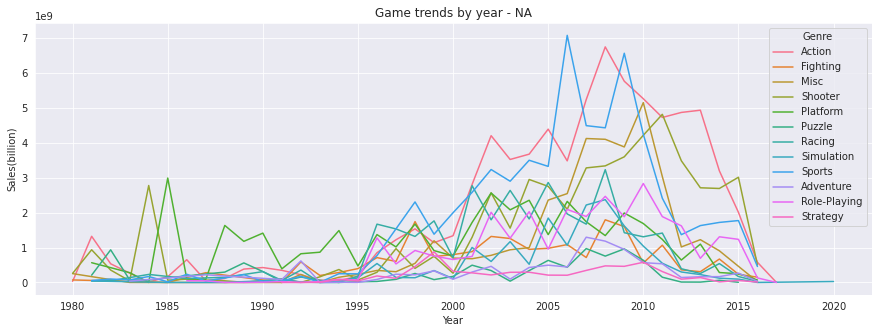

In [21]:
# Game trends by year - NA
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='NA_Sales',hue='Genre')
y_g.set_title('Game trends by year - NA')
y_g.set_ylabel('Sales(billion)')

plt.show()
#지역별로 좀 더 자세히 살펴보겠습니다. 먼저 북미지역입니다. 
#북미지역은 전체 판매량 추이와 비슷한 경향을 보이고 있습니다.
#다만, 2015년도에 들어서면서부터 슈팅 장르의 게임이 1위를 차지하기 시작하였습니다.

In [40]:
#여기서 구체적으로 어떤 게임이 가장 많이 팔렸는지 알아보겠습니다.
#2000년대 중후반에 북미 가장많이 팔린 게임 장르 : Sports
NA_SP = df[['Year','Genre','Name','NA_Sales']][df['Genre']=='Sports']
NA_SP = NA_SP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_SP_0510 = NA_SP[NA_SP['Year']<=2010].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_SP_0510.head(5)
#2000년대 중후반에 북미지역에서 가장 많이 Sports장르의 게임은 [Wii Sports]입니다.
#상위 4위의 게임이 모두 Will Sports시리즈 인것임을 알 수 있습니다.

,Year,Genre,Name,NA_Sales
0,2006,Sports,Wii Sports,4149000000
1,2009,Sports,Wii Sports Resort,1575000000
2,2009,Sports,Wii Fit Plus,909000000
3,2007,Sports,Wii Fit,894000000
4,2006,Sports,Madden NFL 07,771000000


In [41]:
# 2000년대 중후반에 북미에서 가장많이 팔린 게임 장르 : Action
NA_AC = df[['Year','Genre','Name','NA_Sales']][df['Genre']=='Action']
NA_AC = NA_AC.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_AC_0510 = NA_AC[NA_AC['Year']<=2010].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_AC_0510.head(5)
#2000년대 중후반에 북미지역에서 가장 많이 Action장르의 게임은 [Grand Theft Auto IV]입니다.

,Year,Genre,Name,NA_Sales
0,2008,Action,Grand Theft Auto IV,1152000000
1,2004,Action,Grand Theft Auto: San Andreas,943000000
2,2007,Action,LEGO Star Wars: The Complete Saga,910000000
3,2002,Action,Grand Theft Auto: Vice City,841000000
4,2001,Action,Grand Theft Auto III,699000000


In [42]:
# Shooter
NA_SH = df[['Year','Genre','Name','NA_Sales']][df['Genre']=='Shooter']
NA_SH = NA_SH.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
NA_SH_2015 = NA_SH[NA_SH['Year']>=2015].sort_values(by='NA_Sales',ascending=False).reset_index().drop('index',axis=1)
NA_SH_2015.head(5)
#2000년대 중반에 북미지역에서 가장 많이 Shooter장르의 게임은 [Call of Duty: Black Ops 3]입니다.

,Year,Genre,Name,NA_Sales
0,2015,Shooter,Call of Duty: Black Ops 3,1189000000
1,2015,Shooter,Star Wars Battlefront (2015),500000000
2,2015,Shooter,Halo 5: Guardians,264000000
3,2015,Shooter,Gears of War: Ultimate Edition,238000000
4,2015,Shooter,Destiny: The Taken King,197000000


### 연도별 게임 트렌드 - 유럽

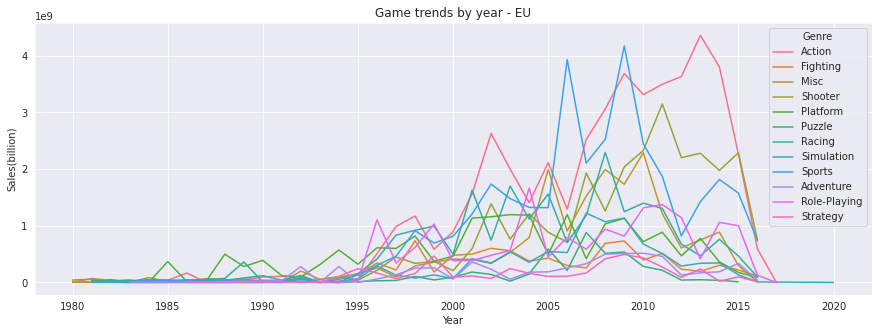

In [25]:
# Game trends by year - EU
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='EU_Sales',hue='Genre')
y_g.set_title('Game trends by year - EU')
y_g.set_ylabel('Sales(billion)')

plt.show()

In [43]:
# 2000년대 중후반에 유럽에서 가장많이 팔린 게임 장르 : Sports
EU_SP = df[['Year','Genre','Name','EU_Sales']][df['Genre']=='Sports']
EU_SP = EU_SP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
EU_SP_0510 = EU_SP[EU_SP['Year']<=2010].sort_values(by='EU_Sales',ascending=False).reset_index().drop('index',axis=1)
EU_SP_0510.head(5)
#2000년대 중후반에 유럽 지역에서 가장 많이 팔린 Sports장르의 게임은 [Wii Sports]입니다.
#북미 지역과 유사하게 Wii Sports 시리즈의 인기가 좋았습니다.

,Year,Genre,Name,EU_Sales
0,2006,Sports,Wii Sports,2902000000
1,2009,Sports,Wii Sports Resort,1101000000
2,2009,Sports,Wii Fit Plus,859000000
3,2007,Sports,Wii Fit,803000000
4,2009,Sports,FIFA Soccer 10,623000000


In [44]:
# 2010년대 이후 유럽에서 가장많이 팔린 게임 장르 : Action
EU_AC = df[['Year','Genre','Name','EU_Sales']][df['Genre']=='Action']
EU_AC = EU_AC.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
EU_AC_2000 = EU_AC[EU_AC['Year']>=2010].sort_values(by='EU_Sales',ascending=False).reset_index().drop('index',axis=1)
EU_AC_2000.head(5)
# 2000년대 중후반에 유럽 지역에서 가장 많이 팔린 Sports장르의 게임은 [Grand Theft Auto V]입니다.
#북미 지역과 유사하게 Wii Sports 시리즈의 인기가 좋았습니다.")

,Year,Genre,Name,EU_Sales
0,2013,Action,Grand Theft Auto V,1458000000
1,2012,Action,FIFA Soccer 13,980000000
2,2014,Action,Grand Theft Auto V,782000000
3,2013,Action,Assassin's Creed IV: Black Flag,518000000
4,2010,Action,Red Dead Redemption,458000000


### 연도별 게임 트렌드 - 일본

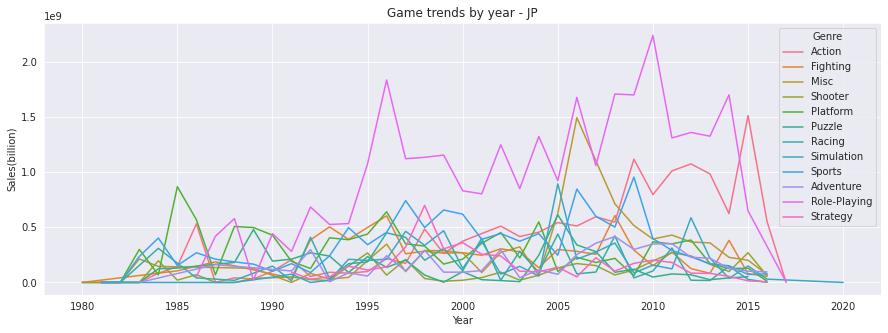

일본은 꾸준히 Role-Playing 장르가 많이 팔렸다. 다만, 2010년대 중반에 들어서면서 Action이 Role-Playing을 따라잡았다.


In [28]:
# Game trends by year - JP
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='JP_Sales',hue='Genre')
y_g.set_title('Game trends by year - JP')
y_g.set_ylabel('Sales(billion)')

plt.show()
print('일본은 꾸준히 Role-Playing 장르가 많이 팔렸다. 다만, 2010년대 중반에 들어서면서 Action이 Role-Playing을 따라잡았다.')

In [45]:
#일본에서 롤플레잉이 가장 많이 팔린 2010년에 어떤 게임이 팔렸나?
JP_RP = df[['Year','Genre','Name','JP_Sales']][df['Genre']=='Role-Playing']
JP_RP = JP_RP.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
JP_RP_2010 = JP_RP[JP_RP['Year']>= 2010].sort_values(by='JP_Sales',ascending=False).reset_index().drop('index',axis=1)
JP_RP_2010.head(5)
# 2010년, 일본에서 가장 많이 팔린 Role-Playing 게임은 [Pokemon Black/Pokemon White]입니다.

,Year,Genre,Name,JP_Sales
0,2010,Role-Playing,Pokemon Black/Pokemon White,565000000
1,2010,Role-Playing,Monster Hunter Freedom 3,487000000
2,2013,Role-Playing,Monster Hunter 4,344000000
3,2014,Role-Playing,Yokai Watch 2 Ganso/Honke,318000000
4,2012,Role-Playing,Pokemon Black 2/Pokemon White 2,314000000


In [46]:
#2010년대 중반, 일본에서 Role-Playing을 역전하고 가장많이 팔린 Action장르의 게임들
JP_AC = df[['Year','Genre','Name','JP_Sales']][df['Genre']=='Action']
JP_AC = JP_AC.groupby(['Year','Genre','Name']).sum().sort_values(by='Year').reset_index()
JP_AC_2015 = JP_AC[JP_AC['Year']>= 2015].sort_values(by='JP_Sales',ascending=False).reset_index().drop('index',axis=1)
JP_AC_2015.head(5)
# 2010년대 중반, 일본에서 Role-Playing을 역전하고 가장 많이 팔린 Action 게임은 [Monster Hunter X]입니다.

,Year,Genre,Name,JP_Sales
0,2015,Action,Monster Hunter X,278000000
1,2015,Action,Yokai Watch Busters,228000000
2,2016,Action,Yokai Watch 3,127000000
3,2015,Action,Dragon Quest Heroes: The World's Tree Woe and ...,86000000
4,2015,Action,Monster Strike 3DS,86000000


### 연도별 게임 트렌드 - 그 외 지역

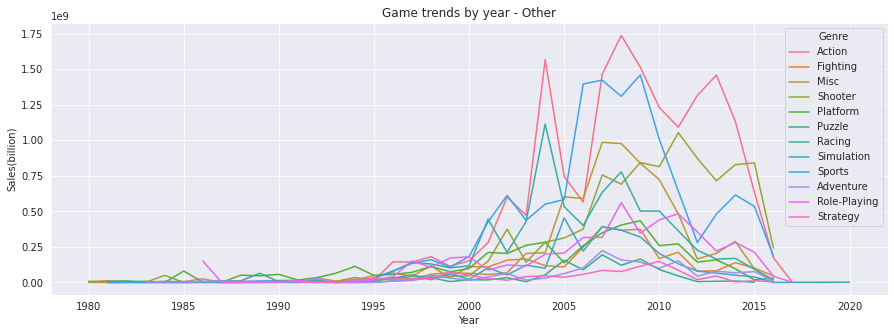

In [31]:
# Game trends by year - Other
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

y_g = sns.lineplot(data=year_genre,x='Year',y='Other_Sales',hue='Genre')
y_g.set_title('Game trends by year - Other')
y_g.set_ylabel('Sales(billion)')

plt.show()

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [33]:
#grouped_Name = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']].groupby(df['Name']).sum().sort_values(by='Total',ascending=False)
grouped_Name = df.groupby(by=['Name','Genre','Platform','Publisher']).sum().sort_values(by='Total',ascending=False)
#grouped_Name.head(10) #상위 10개중에서는 9개가 Nintendo에서 출시한 게임
grouped_Name.head(20) #상위 20개 중 17개가 Nintendo에서 출시한 게임

,,,,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Name,Genre,Platform,Publisher,,,,,,
Wii Sports,Sports,Wii,Nintendo,2006,4149000000,2902000000,377000000,846000000,8274000000
Super Mario Bros.,Platform,NES,Nintendo,1985,2908000000,358000000,681000000,77000000,4024000000
Mario Kart Wii,Racing,Wii,Nintendo,2008,1585000000,1288000000,379000000,331000000,3583000000
Wii Sports Resort,Sports,Wii,Nintendo,2009,1575000000,1101000000,328000000,296000000,3300000000
Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo,1996,1127000000,889000000,1022000000,1000000,3039000000
Duck Hunt,Shooter,NES,Nintendo,1984,2693000000,63000000,28000000,47000000,2831000000
New Super Mario Bros. Wii,Platform,Wii,Nintendo,2009,1459000000,706000000,47000000,226000000,2438000000
Mario Kart DS,Racing,DS,Nintendo,2005,981000000,757000000,413000000,192000000,2343000000
Wii Fit Plus,Sports,Wii,Nintendo,2009,909000000,859000000,253000000,179000000,2200000000


### Games published by Nintendo

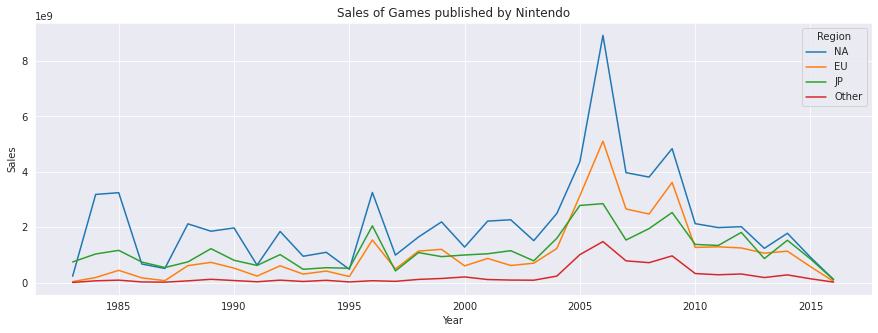

In [47]:
# Games published by Nintendo
nintendo = df[df['Publisher']=='Nintendo']
nintendo_year = nintendo.groupby(by='Year').sum().reset_index()
nintendo_year = nintendo_year.rename(columns={'NA_Sales':'NA','EU_Sales':'EU','JP_Sales':'JP','Other_Sales':'Other'})
nintendo_melt = nintendo_year.melt(id_vars=['Year'],value_vars=['NA','EU','JP','Other'])
nintendo_melt = nintendo_melt.rename(columns={'variable':'Region','value':'Sales'}).sort_values(by='Year').reset_index().drop('index',axis=1)
nintendo_melt.head(10)


plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

ax = sns.lineplot(data=nintendo_melt,x='Year',y='Sales',hue='Region')
ax.set_title('Sales of Games published by Nintendo')
plt.show()

In [48]:
nintendo

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
32,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0,0,1000000,0,1000000
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,3000000,3000000,4000000,3000000,13000000
64,Kirby: Mass Attack,DS,2011,Platform,Nintendo,52000000,6000000,41000000,5000000,104000000
68,Command & Conquer,N64,1999,Strategy,Nintendo,22000000,5000000,0,0,27000000
74,Wrecking Crew,NES,1985,Platform,Nintendo,0,0,51000000,0,51000000
...,...,...,...,...,...,...,...,...,...,...
16160,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,366000000,242000000,98000000,64000000,770000000
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,1459000000,706000000,47000000,226000000,2438000000
16185,Pocket Monsters Stadium,N64,1998,Strategy,Nintendo,0,0,137000000,0,137000000
16199,ASH: Archaic Sealed Heat,DS,2007,Role-Playing,Nintendo,0,0,12000000,0,12000000
